<a href="https://colab.research.google.com/github/jaoviedoc/Estructuras_Hidraulicas/blob/main/Mapeo_de_Variables_Bioclim%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [14]:
# @title Datos
from io import StringIO

# Tu conjunto de datos
data_str = """Punto X(m) Y(m) T_Suelo(℃) LUX Tbs(℃) Tg(℃) HR(%) WBGT
1 0 0 24.3 1790 20.7 20.5 42 15.3
2 2 0 25.5 1720 20.8 20.3 41.5 15.3
3 4 0 19.9 1650 20.7 20.3 41.9 15.3
4 6 0 17 1754 20.8 20.3 41.8 15.3
5 8 0 17.2 1890 20.8 20.3 41.8 15.3
6 10 0 17.1 1780 20.8 20.2 41.4 15.2
7 0 2 24.7 2320 20.8 19.8 41.8 15.2
8 2 2 24.5 2380 20.7 19.9 42 15.3
9 4 2 24.5 2440 20.8 20 41.6 15.2
10 6 2 18 2450 20.8 20.1 41.8 15.3
11 8 2 16.3 2320 20.9 20 41.1 15.1
12 10 2 16.6 2200 20.7 19.9 40.6 15.1
13 0 4 22.8 2412 20.8 19.7 42.9 15.1
14 2 4 23.2 2500 20.7 19.6 42.4 15.2
15 4 4 23.2 2520 20.8 19.5 42.8 15.2
16 6 4 16.7 2513 20.9 19.5 43.5 15.4
17 8 4 16.1 2445 20.9 19.7 45.6 15.6
18 10 4 15.4 2510 21 19.6 43.9 15.6
19 0 6 23.3 2560 21.1 19.9 42.5 15.5
20 2 6 24 2516 21.2 20.2 42.6 15.7
21 4 6 20 2810 21.3 20.8 42.2 15.1
22 6 6 17.6 2770 21.5 21.3 44 16.3
23 8 6 16.6 2700 21.7 21.4 45 16.6
24 10 6 13.9 2744 21.7 21.6 45.7 16.7
25 0 8 23.2 2480 21.8 21.7 43.2 16.6
26 2 8 23.8 2730 21.9 21.6 44.1 16.6
27 4 8 20.5 2800 22.1 21.4 42.8 16.5
28 6 8 16 2880 22.2 21.5 41.8 16.5
29 8 8 17.2 2830 22.3 21.7 42.3 16.7
30 10 8 17.2 2860 22.4 21.9 42.5 16.8
31 0 10 22 2160 22.6 21.9 40.9 16.7
32 2 10 24 2620 22.6 22.2 39.7 16.6
33 4 10 16.1 2670 22.6 22.3 38.3 16.6
34 6 10 18.3 2660 22.8 22.3 37.7 16.6
35 8 10 16.6 2560 22.8 22.2 38.1 16.6
36 10 10 17.7 2750 22.8 22.4 37.2 16.6
37 0 12 21.3 2060 22.9 22.3 39.5 17.2
38 2 12 24.2 2530 22.8 22.2 39 16.6
39 4 12 18.6 2411 22.8 22 37.1 16.3
40 6 12 16.2 2628 22.9 21.5 37.2 16.3
41 8 12 15.8 2613 22.9 21.3 36.1 16.1
42 10 12 16 2693 22.7 21.1 36.4 16"""

# Crea un DataFrame a partir de la cadena de datos
df = pd.read_csv(StringIO(data_str), delimiter='\s+')


In [15]:
# Exploración inicial de los datos
print(df.head())

   Punto  X(m)  Y(m)  T_Suelo(℃)   LUX  Tbs(℃)  Tg(℃)  HR(%)  WBGT
0      1     0     0        24.3  1790    20.7   20.5   42.0  15.3
1      2     2     0        25.5  1720    20.8   20.3   41.5  15.3
2      3     4     0        19.9  1650    20.7   20.3   41.9  15.3
3      4     6     0        17.0  1754    20.8   20.3   41.8  15.3
4      5     8     0        17.2  1890    20.8   20.3   41.8  15.3


In [16]:
# Crear una malla para la interpolación
xi, yi = np.meshgrid(np.linspace(df['X(m)'].min(), df['X(m)'].max(), 100),
                     np.linspace(df['Y(m)'].min(), df['Y(m)'].max(), 100))

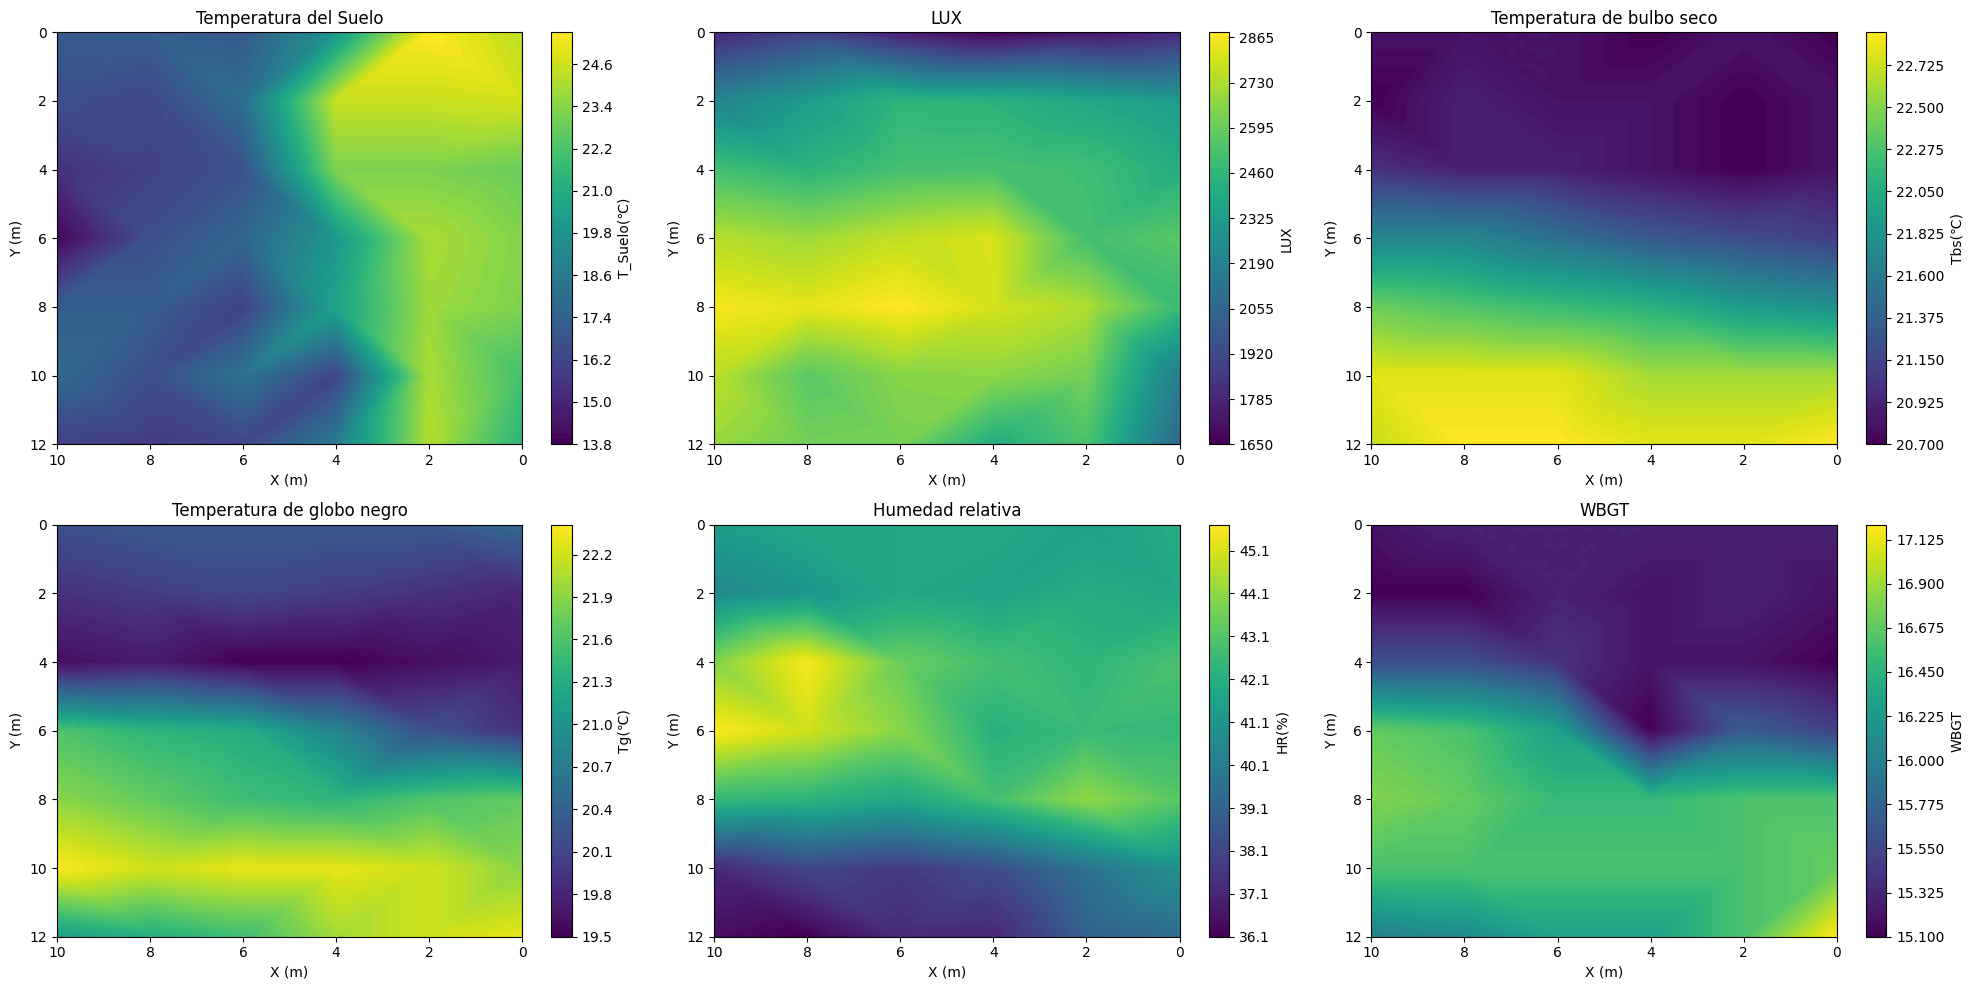

In [17]:
# Nombres y datos para las gráficas
graficas = [
    ('Temperatura del Suelo', 'T_Suelo(℃)'),
    ('LUX', 'LUX'),
    ('Temperatura de bulbo seco', 'Tbs(℃)'),
    ('Temperatura de globo negro', 'Tg(℃)'),
    ('Humedad relativa', 'HR(%)'),
    ('WBGT', 'WBGT')
]

# Crear la matriz de subgráficos 2x3
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Aplanar la matriz de subgráficos para facilitar el acceso
axs = axs.flatten()

# Iterar sobre las gráficas y dibujar en los subgráficos correspondientes
for i, (titulo, columna) in enumerate(graficas, start=1):
    # Interpolación de los datos
    zi = griddata((df['X(m)'], df['Y(m)']), df[columna], (xi, yi), method='linear')

    # Graficar la superficie interpolada y agregar leyenda
    c = axs[i - 1].contourf(xi, yi, zi, cmap='viridis', levels=100)
    axs[i - 1].set_title(titulo)
    axs[i - 1].set_xlabel('X (m)')
    axs[i - 1].set_ylabel('Y (m)')

    # Invertir los ejes
    axs[i - 1].invert_xaxis()
    axs[i - 1].invert_yaxis()

    # Agregar leyenda
    fig.colorbar(c, ax=axs[i - 1], label=f'{columna}')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

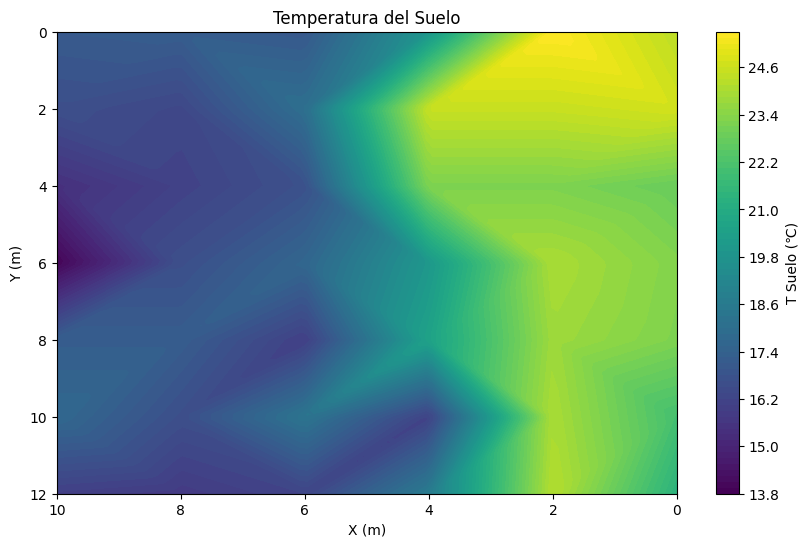

In [18]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['T_Suelo(℃)'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='T Suelo (℃)')

# Configurar el título y las etiquetas de los ejes
plt.title('Temperatura del Suelo')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


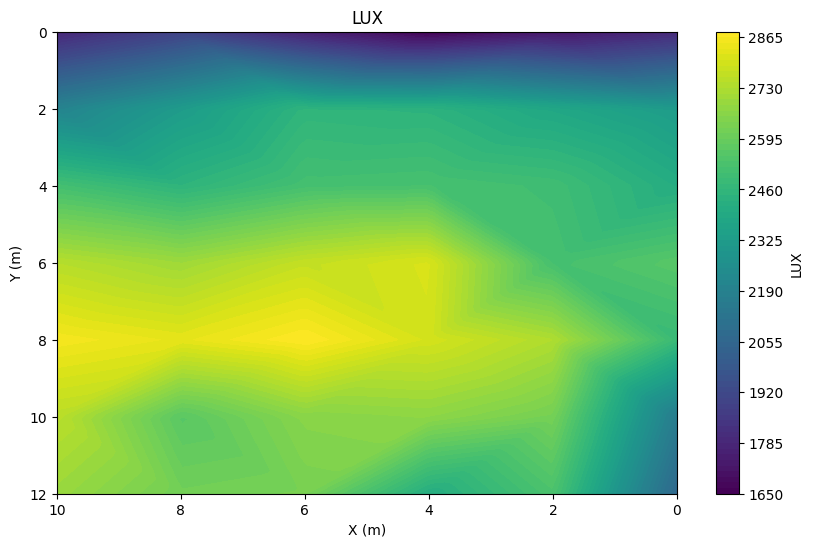

In [19]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['LUX'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='LUX')

# Configurar el título y las etiquetas de los ejes
plt.title('LUX')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

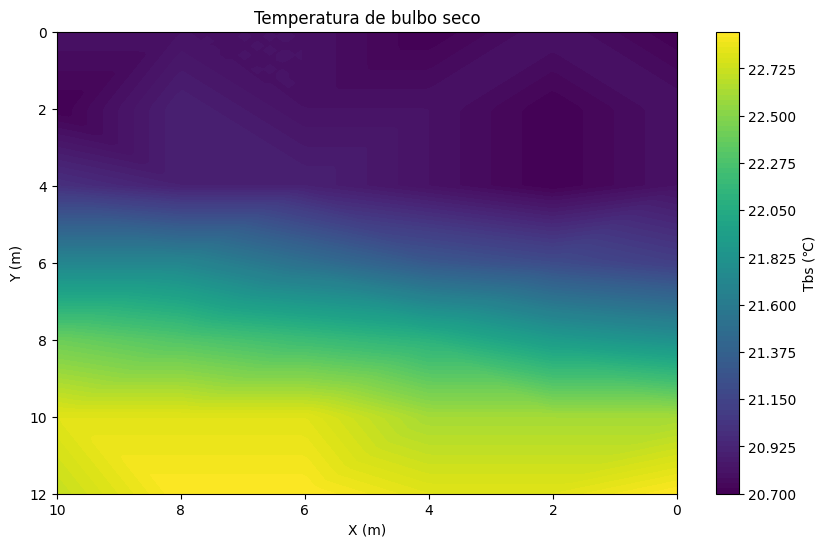

In [20]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['Tbs(℃)'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='Tbs (℃)')

# Configurar el título y las etiquetas de los ejes
plt.title('Temperatura de bulbo seco')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

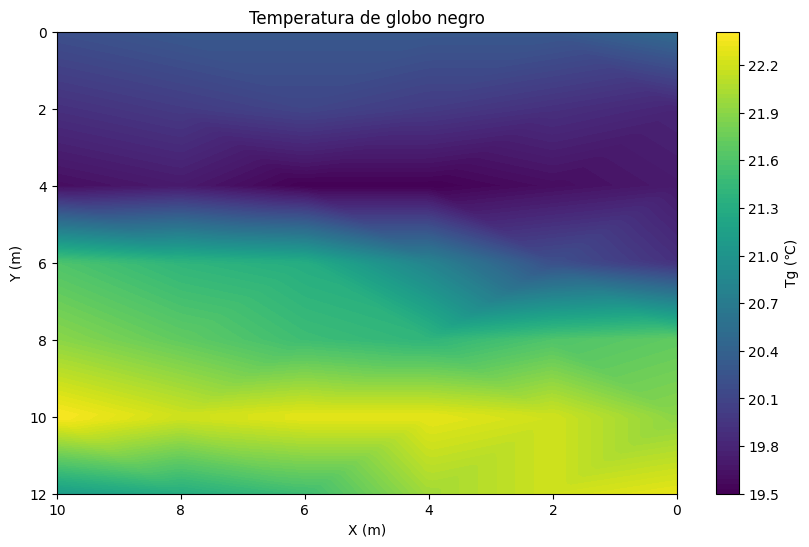

In [21]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['Tg(℃)'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='Tg (℃)')

# Configurar el título y las etiquetas de los ejes
plt.title('Temperatura de globo negro')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

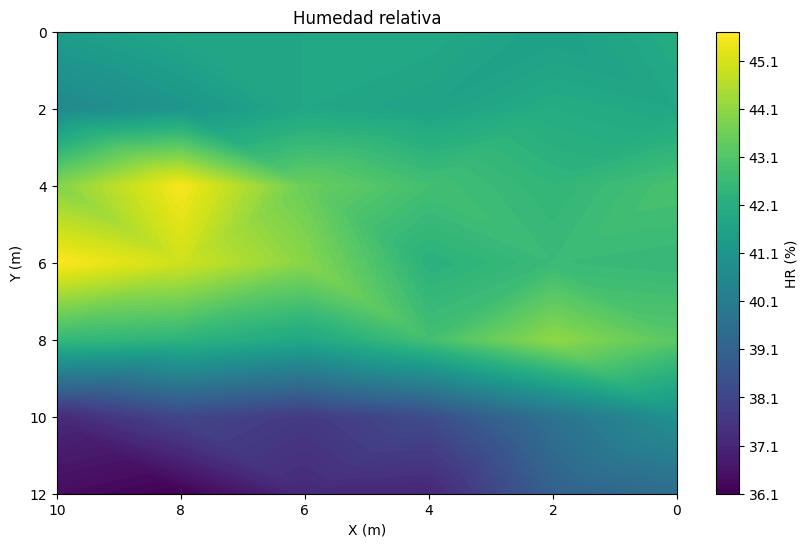

In [22]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['HR(%)'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='HR (%)')

# Configurar el título y las etiquetas de los ejes
plt.title('Humedad relativa')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

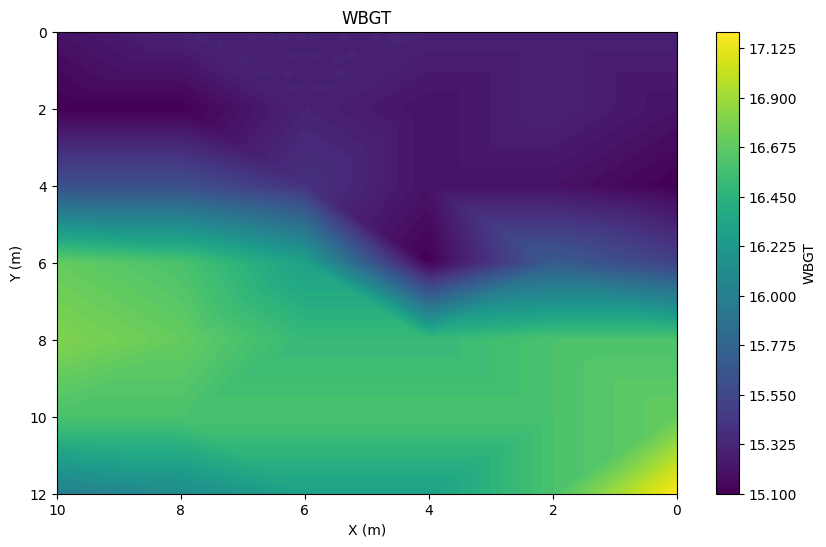

In [23]:
# Interpolación de los datos
zi = griddata((df['X(m)'], df['Y(m)']), df['WBGT'], (xi, yi), method='linear')

# Graficar la superficie interpolada
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis', levels=100)
plt.colorbar(label='WBGT')

# Configurar el título y las etiquetas de los ejes
plt.title('WBGT')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# Invertir los ejes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

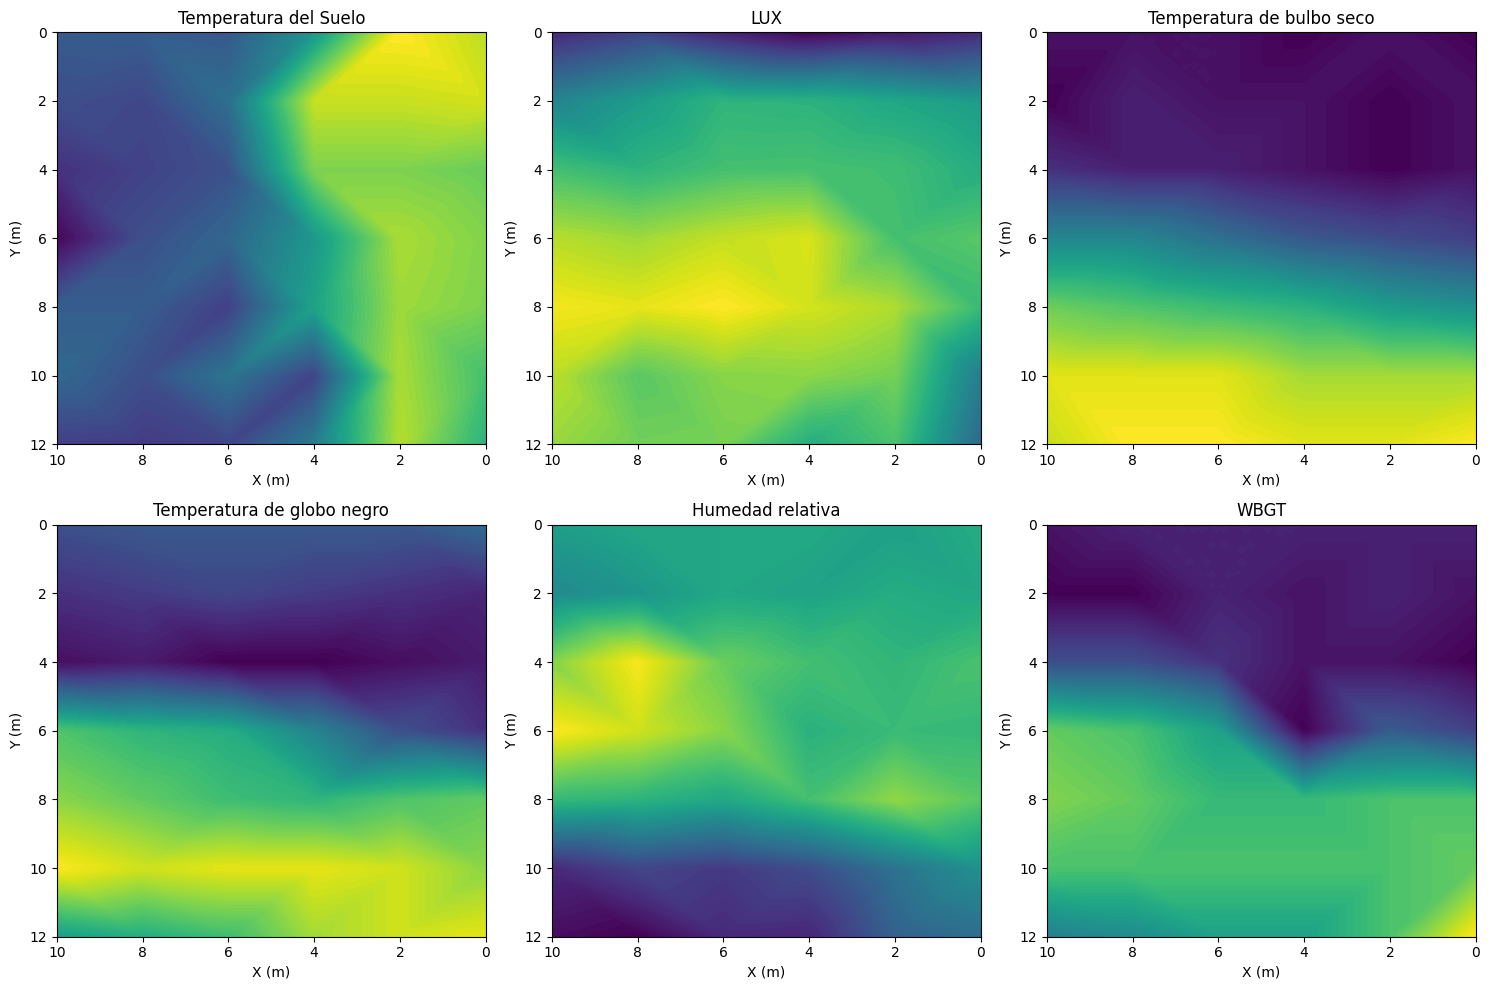

In [24]:
# Crear una malla para la interpolación
xi, yi = np.meshgrid(np.linspace(df['X(m)'].min(), df['X(m)'].max(), 100),
                      np.linspace(df['Y(m)'].min(), df['Y(m)'].max(), 100))

# Nombres y datos para las gráficas
graficas = [
    ('Temperatura del Suelo', 'T_Suelo(℃)'),
    ('LUX', 'LUX'),
    ('Temperatura de bulbo seco', 'Tbs(℃)'),
    ('Temperatura de globo negro', 'Tg(℃)'),
    ('Humedad relativa', 'HR(%)'),
    ('WBGT', 'WBGT')
]

# Crear la matriz de subgráficos 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Aplanar la matriz de subgráficos para facilitar el acceso
axs = axs.flatten()

# Iterar sobre las gráficas y dibujar en los subgráficos correspondientes
for i, (titulo, columna) in enumerate(graficas, start=1):
    # Interpolación de los datos
    zi = griddata((df['X(m)'], df['Y(m)']), df[columna], (xi, yi), method='linear')

    # Graficar la superficie interpolada
    axs[i - 1].contourf(xi, yi, zi, cmap='viridis', levels=100)
    axs[i - 1].set_title(titulo)
    axs[i - 1].set_xlabel('X (m)')
    axs[i - 1].set_ylabel('Y (m)')

    # Invertir los ejes
    axs[i - 1].invert_xaxis()
    axs[i - 1].invert_yaxis()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()
